<a href="https://colab.research.google.com/github/xxcramseyxx/KerasMNIST/blob/main/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
reshape = 784
x_train = x_train.reshape(60000, reshape)
x_test = x_test.reshape(10000, reshape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
#pixel values are between 0 - 255
x_train /= 255
x_test /= 255

print (x_train.shape[1])

784


In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)



In [ ]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Train on 57000 samples, validate on 3000 samples
Epoch 1/50
57000/57000 [==============================] - 1s 17us/step - loss: 1.4887 - acc: 0.5676 - val_loss: 1.0180 - val_acc: 0.7073
Epoch 2/50
57000/57000 [==============================] - 1s 17us/step - loss: 0.8986 - acc: 0.7502 - val_loss: 0.6437 - val_acc: 0.8317
Epoch 3/50
57000/57000 [==============================] - 1s 16us/step - loss: 0.7002 - acc: 0.8009 - val_loss: 0.5697 - val_acc: 0.8350
Epoch 4/50
57000/57000 [==============================] - 1s 17us/step - loss: 0.6462 - acc: 0.8097 - val_loss: 0.5322 - val_acc: 0.8427
Epoch 5/50
57000/57000 [==============================] - 1s 16us/step - loss: 0.6133 - acc: 0.8148 - val_loss: 0.5083 - val_acc: 0.8453
Epoch 6/50
57000/57000 [==============================] - 1s 17us/step - loss: 0.5910 - acc: 0.8190 - val_loss: 0.4921 - val_acc: 0.8460
Epoch 7/50
57000/57000 [==============================] - 1s 17us/step - loss: 0.5748 - acc: 0.8216 - val_loss: 0.4805 - val_acc:

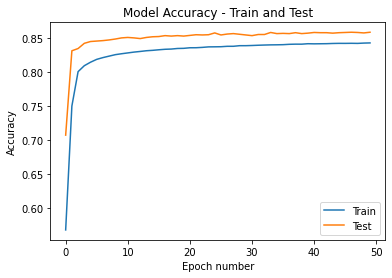

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['acc'])
model_train = model.fit(x_train, Y_train, batch_size=100, epochs=50, verbose=1, validation_split=(0.05))

plt.plot(model_train.history['acc'], label='Train')
plt.plot(model_train.history['val_acc'], label='Test')
plt.title('Model Accuracy - Train and Test')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test Accuracy: {}'.format(score[1]))

Test Accuracy: 0.8432000279426575
